In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('spam_data.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']

In [3]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


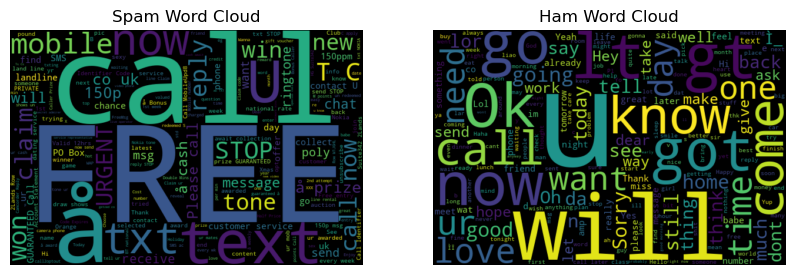

In [4]:
from wordcloud import WordCloud
spam_words = ' '.join(df[df['label'] == 'spam']['text'])
ham_words = ' '.join(df[df['label'] == 'ham']['text'])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=600, height=400).generate(spam_words), interpolation='bilinear')
plt.title("Spam Word Cloud")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(WordCloud(width=600, height=400).generate(ham_words), interpolation='bilinear')
plt.title("Ham Word Cloud")
plt.axis('off')
plt.show()


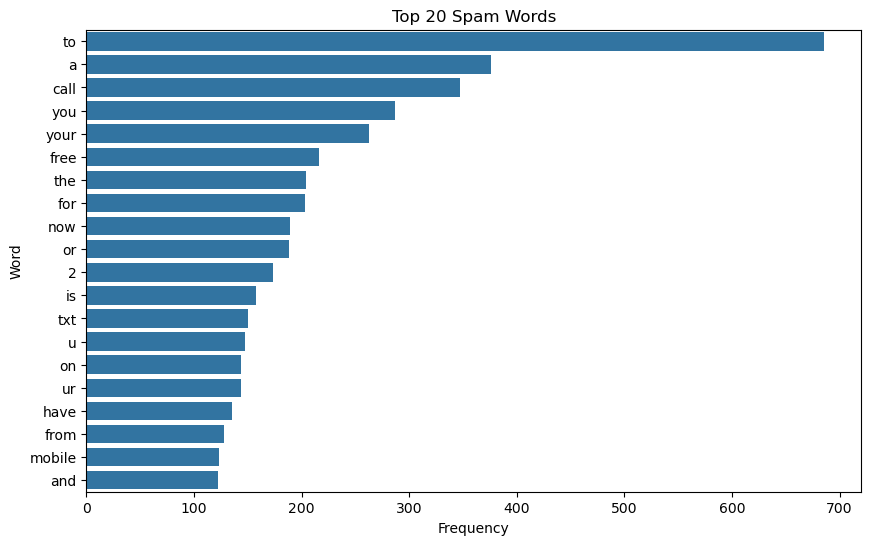

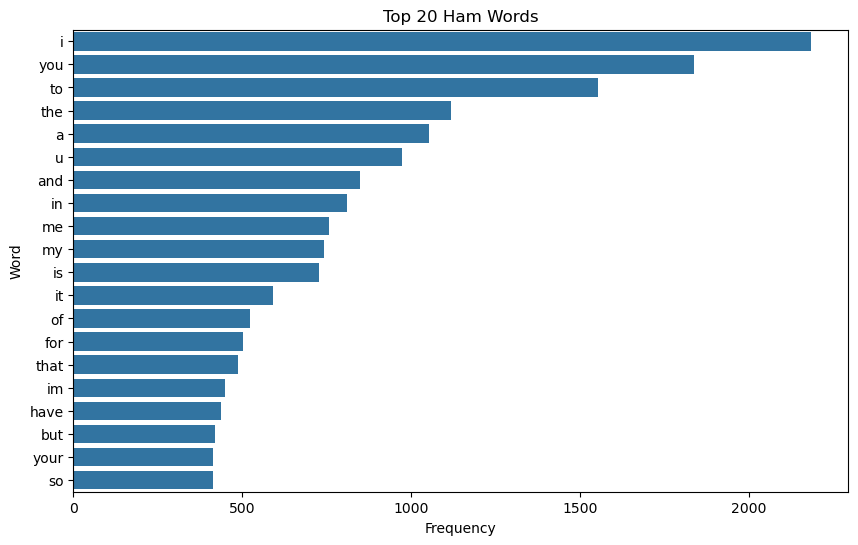

In [5]:
from collections import Counter
import string
def get_top_n_words(corpus, n=None):
    words = ' '.join(corpus).lower()
    words = words.translate(str.maketrans('', '', string.punctuation))
    word_list = words.split()
    counter = Counter(word_list)
    return counter.most_common(n)
top_spam_words = get_top_n_words(df[df['label']=='spam']['text'], 20)
top_ham_words = get_top_n_words(df[df['label']=='ham']['text'], 20)

# Plot top spam words
spam_words_df = pd.DataFrame(top_spam_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(10,6))
sns.barplot(data=spam_words_df, x='Frequency', y='Word')
plt.title("Top 20 Spam Words")
plt.show()

# Plot top ham words
ham_words_df = pd.DataFrame(top_ham_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(10,6))
sns.barplot(data=ham_words_df, x='Frequency', y='Word')
plt.title("Top 20 Ham Words")
plt.show()


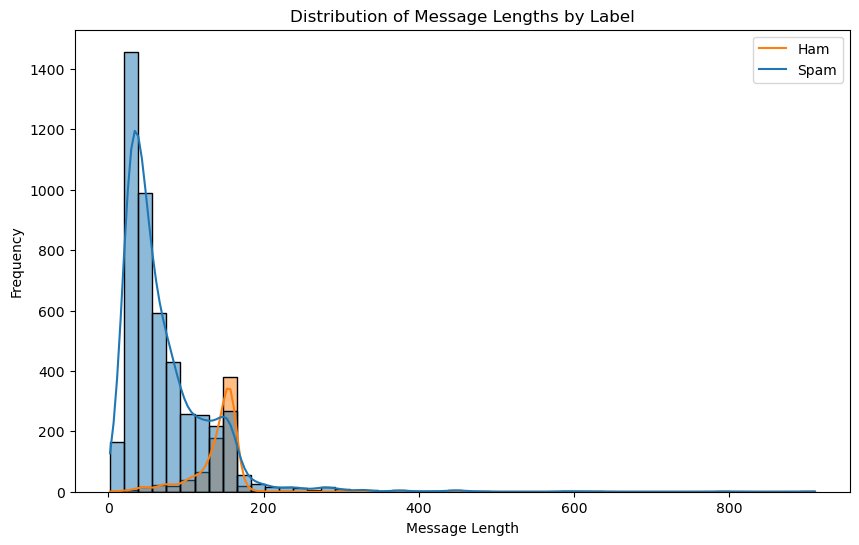

In [6]:
df['length'] = df['text'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='length', hue='label', bins=50, kde=True)
plt.title("Distribution of Message Lengths by Label")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.legend(["Ham", "Spam"])
plt.show()


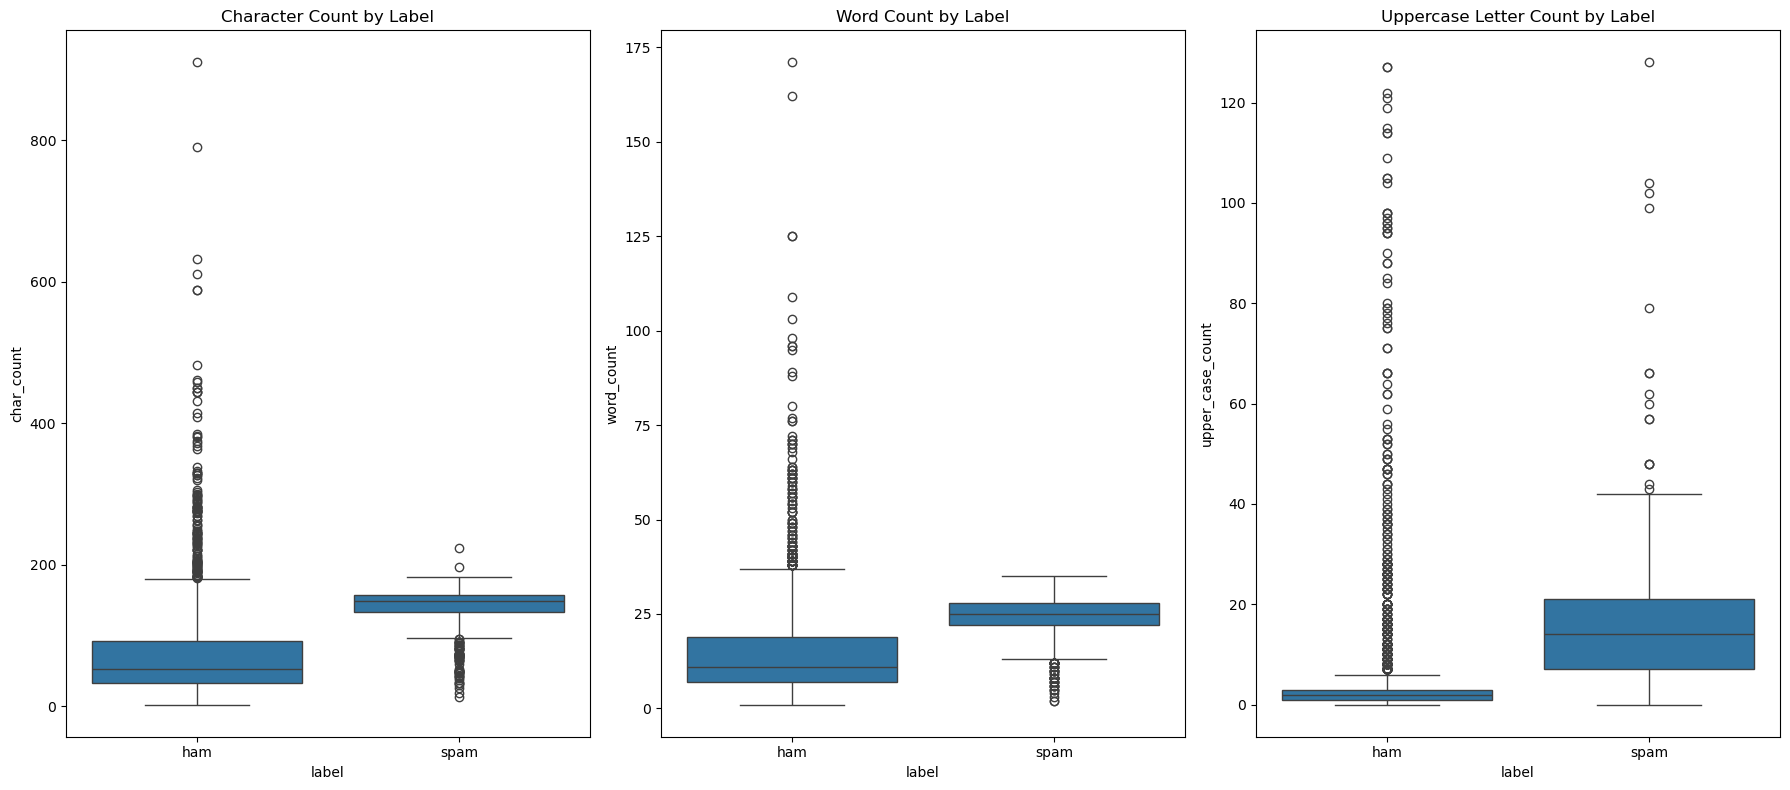

In [7]:
# Create new features
df['char_count'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['upper_case_count'] = df['text'].apply(lambda x: sum(1 for c in x if c.isupper()))
# Plot comparisons
fig, axes = plt.subplots(1, 3, figsize=(18,8))
sns.boxplot(data=df, x='label', y='char_count', ax=axes[0])
axes[0].set_title('Character Count by Label')
sns.boxplot(data=df, x='label', y='word_count', ax=axes[1])
axes[1].set_title('Word Count by Label')
sns.boxplot(data=df, x='label', y='upper_case_count', ax=axes[2])
axes[2].set_title('Uppercase Letter Count by Label')
plt.tight_layout()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Split data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)
# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



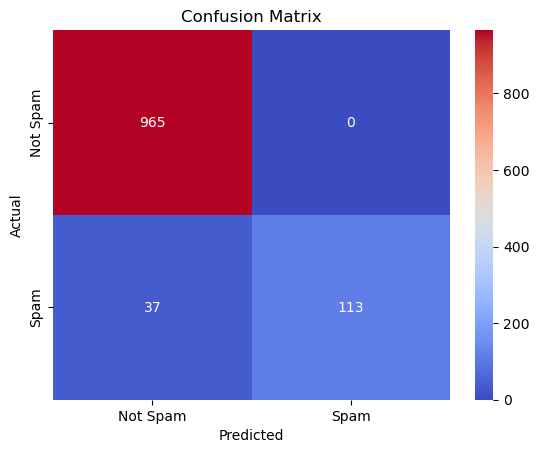

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [15]:
# Predict an email
def predict_email(email_text):
    email_vec = vectorizer.transform([email_text])
    pred = model.predict(email_vec)
    return 'Spam' if pred[0] == 1 else 'Not Spam'
# Example
print(predict_email("Congratulations! You've won a $1000 gift card. Click to claim now."))


Spam
